# Define image dimensions, batch size and epochs



In [1]:
image_height = 256
image_width = 256
batch_size = 32
epochs = 1

# Mount Google Drive



In [2]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google.colab'

# Define paths to your dataset

In [ ]:
train_directory = '/gdrive/MyDrive/Machine Learning/Datasets/train'
validation_directory = '/gdrive/MyDrive/Machine Learning/Datasets/validation'
test_directory = '/gdrive/MyDrive/Machine Learning/Datasets/test'

# Import libraries we use

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from PIL import Image

# Check GPU

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Create data generators with data augmentation

In [ ]:
ImageFlow = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.25,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the dataset

In [ ]:
# classes = ['apple', 'banana', 'mixed', 'orange']

# for class_name in classes:
#     # Create a directory for each class
#     image_directory = os.path.join(train_directory, class_name)

#     # Iterate over all the files in the directory
#     for filename in os.listdir(image_directory):
#         if filename.endswith('.jpg'):
#             # Open the image file
#             image_path = os.path.join(image_directory, filename)
#             image = Image.open(image_path)

#             # Convert the image to RGB mode
#             image = image.convert('RGB')

#             # Save the image with the same name
#             image.save(image_path)

#             # Close the image file
#             image.close()

#     # Generate augmented images and save them to the train dataset directory
#     for filename in os.listdir(image_directory):
#         img_path = os.path.join(image_directory, filename)
#         img = plt.imread(img_path)  # Read the image using matplotlib
#         img = img.reshape((1,) + img.shape)  # Reshape the image for augmentation
#         save_dir = image_directory  # Set the directory to save the augmented images
#         save_prefix = filename.split('.')[0] # Set the prefix for the saved images
#         save_format = 'jpg'  # Set the format for the saved images

#         # Generate augmented images and save them
#         i = 0
#         for batch in ImageFlow.flow(img, save_to_dir=save_dir, save_prefix=save_prefix, save_format=save_format):
#             # Set the number of augmented images to generate
#             number_of_augmented_images = 6 if class_name == 'mixed' else 3

#             i += 1
#             if i >= number_of_augmented_images:  # Generate 5 augmented images for each original image
#                 break

## Flow images in batches using the generators

In [ ]:
train_generator = ImageFlow.flow_from_directory(
    train_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

Found 8153 images belonging to 4 classes.


In [ ]:
validation_generator = ImageFlow.flow_from_directory(
    validation_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

Found 2717 images belonging to 4 classes.


In [ ]:
steps_per_epoch = train_generator.n//batch_size

print(steps_per_epoch)

254


# Define the CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes: apple, banana, mixed, orange

# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

# Train the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_generator
)

254/254 [==============================] - 188s 737ms/step - loss: 0.7133 - accuracy: 0.7516 - val_loss: 0.4979 - val_accuracy: 0.8778


# Evaluate the model

In [ ]:
model.evaluate(validation_generator)

85/85 [==============================] - 45s 534ms/step - loss: 0.5044 - accuracy: 0.8745


[0.5044020414352417, 0.8744939565658569]

# Plot training history

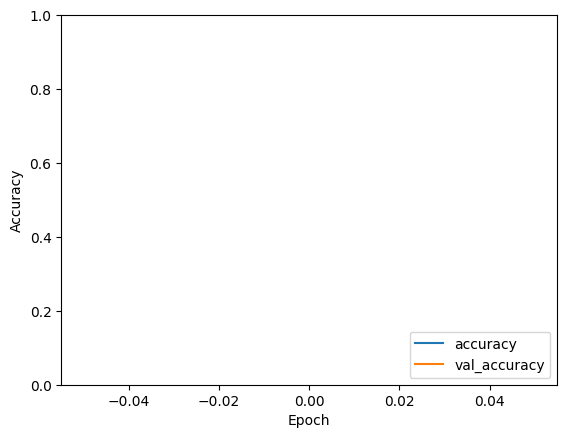

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss graph

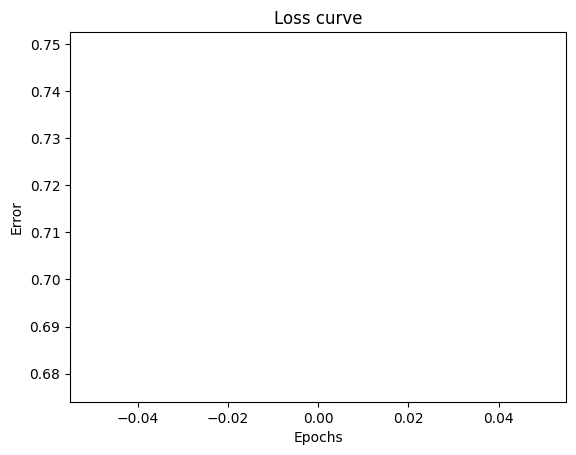

In [ ]:
def plot_loss(history):
  _, ax = plt.subplots()

  plt.plot(history.history['loss'])
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Error')
  ax.set_title('Loss curve')

  plt.show()

plot_loss(history)

In [ ]:
# Save the model
model.save('/gdrive/MyDrive/Machine Learning/Models/image_classification_model.h5')

# Load the trained model
model = models.load_model('/gdrive/MyDrive/Machine Learning/Models/image_classification_model.h5')

# Get the list of test images
test_images = [f for f in os.listdir(test_directory) if f.endswith('.jpg')]

# Initialize lists to store results
image_names = []
actual_class = []
predicted_class = []

# Loop through each test image
for image_name in test_images:
    # Load and preprocess the test image
    img_path = os.path.join(test_directory, image_name)
    img = image.load_img(img_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_label = np.argmax(predictions)
    actual_label = image_name.split('_')[0]

    # Store results
    image_names.append(image_name)
    actual_class.append(actual_label)
    predicted_class.append(predicted_label)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Image': image_names, 'Actual Class': actual_class, 'Predicted Class': predicted_class})

# Define class labels
class_labels = {0: 'apple', 1: 'banana', 2: 'mixed', 3: 'orange'}
results_df['Predicted Class'] = results_df['Predicted Class'].map(class_labels)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('/gdrive/MyDrive/Machine Learning/Results/result.csv', index=False)

# Calculate accuracy
correct_predictions = np.sum(np.array(actual_class) == np.array(results_df['Predicted Class']))
total_predictions = len(test_images)
accuracy = correct_predictions / total_predictions

# Display accuracy
print(f'\nTest Accuracy: {accuracy * 100}%')

1/1 [==============================] - 0s 18ms/step
            Image Actual Class Predicted Class
0    apple_93.jpg        apple           apple
1    apple_87.jpg        apple           apple
2    apple_89.jpg        apple           apple
3    apple_95.jpg        apple           mixed
4   banana_80.jpg       banana          banana
5    apple_77.jpg        apple           mixed
6    apple_91.jpg        apple           apple
7    apple_82.jpg        apple           apple
8    apple_78.jpg        apple           apple
9   banana_77.jpg       banana          banana
10  banana_79.jpg       banana          banana
11   apple_83.jpg        apple           apple
12   apple_86.jpg        apple           mixed
13   apple_85.jpg        apple           mixed
14   apple_81.jpg        apple           apple
15   apple_92.jpg        apple           mixed
16   apple_80.jpg        apple           apple
17  banana_78.jpg       banana          banana
18   apple_90.jpg        apple           apple
19   app